In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dataset=pd.read_csv("/content/kidney_disease.csv")

In [ ]:
dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
# Step 1: Split columns by data type
object_cols = dataset.select_dtypes(include=['object'])
float_cols = dataset.select_dtypes(include=['float64'])
int_cols = dataset.select_dtypes(include=['int64'])

In [ ]:
float_cols.mean()

,0
age,51.483376
bp,76.469072
sg,1.017408
al,1.016949
su,0.450142
bgr,148.036517
bu,57.425722
sc,3.072454
sod,137.528754
pot,4.627244


In [ ]:
object_cols

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,47,6700,4.9,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,54,7800,6.2,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,49,6600,5.4,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
dataset["pcv"] = pd.to_numeric(dataset["pcv"], errors="coerce")
dataset["wc"] = pd.to_numeric(dataset["wc"], errors="coerce")
dataset["rc"] = pd.to_numeric(dataset["rc"], errors="coerce")

In [ ]:
object_cols

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,47,6700,4.9,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,54,7800,6.2,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,49,6600,5.4,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
# Step 1: Split columns by data type
object_cols = dataset.select_dtypes(include=['object'])
float_cols = dataset.select_dtypes(include=['float64'])
int_cols = dataset.select_dtypes(include=['int64'])

In [ ]:
object_cols

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [ ]:
float_cols

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


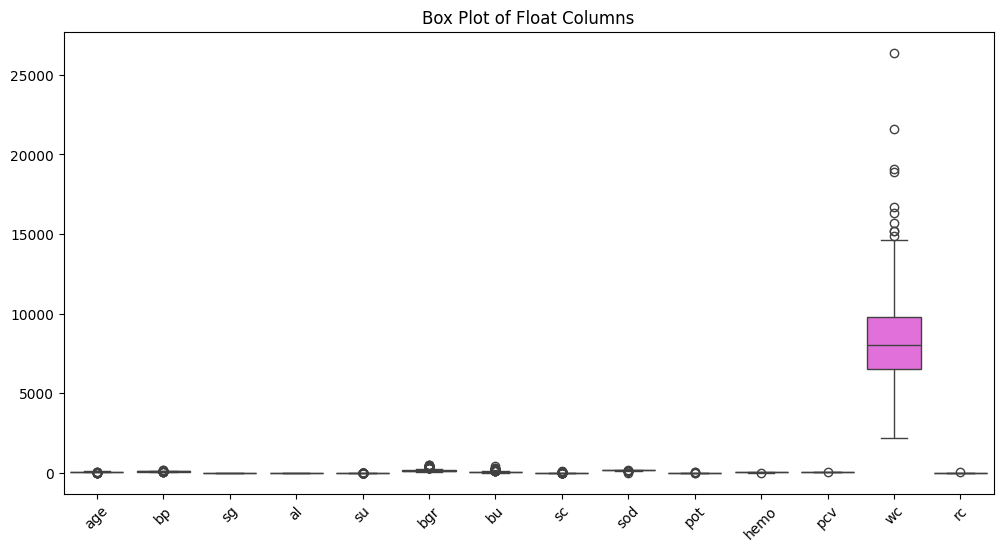

In [ ]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=float_cols)
plt.xticks(rotation=45)
plt.title("Box Plot of Float Columns")
plt.show()

In [ ]:
# Detect Outliers using IQR
outlier_counts = {}
for col in float_cols.columns:
    Q1 = float_cols[col].quantile(0.25)
    Q3 = float_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((float_cols[col] < lower_bound) | (float_cols[col] > upper_bound)).sum()
    outlier_counts[col] = outliers

In [ ]:
# Display Outlier Counts
outlier_counts_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
print(outlier_counts_df)

      Outlier Count
age              10
bp               36
sg                0
al                0
su               61
bgr              34
bu               38
sc               51
sod              16
pot               4
hemo              1
pcv               1
wc               10
rc                1


In [ ]:
# Define function to cap outliers
def cap_outliers(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap values beyond the bounds
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

In [ ]:
# Apply function to replace outliers
float_cols = cap_outliers(float_cols)

In [ ]:
# Detect Outliers using IQR
outlier_counts = {}
for col in float_cols.columns:
    Q1 = float_cols[col].quantile(0.25)
    Q3 = float_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((float_cols[col] < lower_bound) | (float_cols[col] > upper_bound)).sum()
    outlier_counts[col] = outliers

In [ ]:
# Display Outlier Counts
outlier_counts_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
print(outlier_counts_df)

      Outlier Count
age               0
bp                0
sg                0
al                0
su                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0


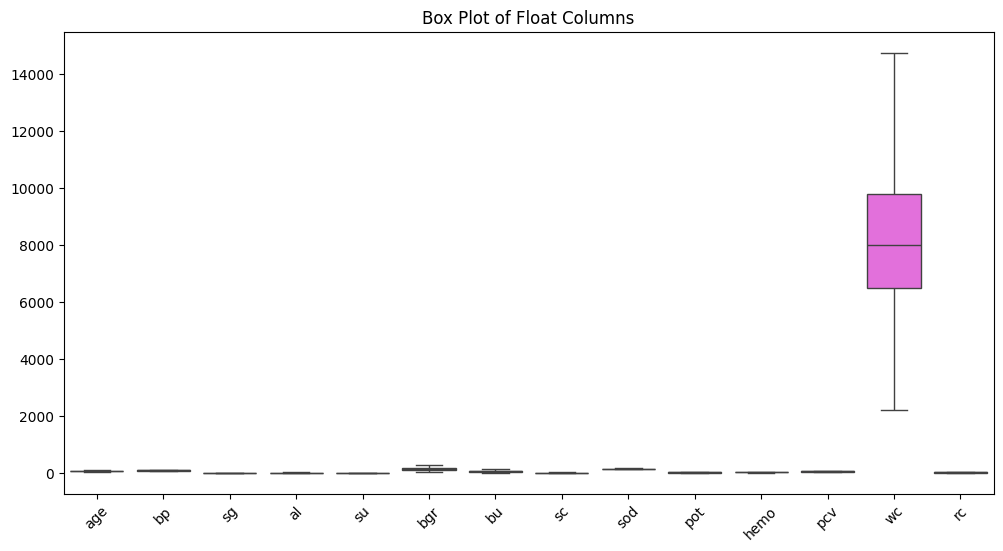

In [ ]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=float_cols)
plt.xticks(rotation=45)
plt.title("Box Plot of Float Columns")
plt.show()

In [ ]:
float_cols.mean()

,0
age,51.551151
bp,75.695876
sg,1.017408
al,1.016949
su,0.000000
bgr,139.971910
bu,51.764304
sc,2.131332
sod,138.207668
pot,4.390064


In [ ]:
object_cols.isnull().sum()

,0
rbc,152
pc,65
pcc,4
ba,4
htn,2
dm,2
cad,2
appet,1
pe,1
ane,1


In [ ]:
float_cols.isnull().sum()

,0
age,9
bp,12
sg,47
al,46
su,49
bgr,44
bu,19
sc,17
sod,87
pot,88


In [ ]:
object_cols.mode()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [ ]:
object_cols.fillna(object_cols.mode().iloc[0], inplace=True)

In [ ]:
object_cols.isnull().sum()

,0
rbc,0
pc,0
pcc,0
ba,0
htn,0
dm,0
cad,0
appet,0
pe,0
ane,0


In [ ]:
float_cols.mean()

,0
age,51.551151
bp,75.695876
sg,1.017408
al,1.016949
su,0.000000
bgr,139.971910
bu,51.764304
sc,2.131332
sod,138.207668
pot,4.390064


In [ ]:
float_cols.isnull().sum()

,0
age,9
bp,12
sg,47
al,46
su,49
bgr,44
bu,19
sc,17
sod,87
pot,88


In [ ]:
# If float_cols was a NumPy array after transformation
colname = list(float_cols.columns)  # Restore original column names

In [ ]:
colname

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

In [ ]:
from sklearn.impute import KNNImputer
float_cols# Initialize KNN Imputer (n_neighbors=3 means it will consider 3 nearest neighbors)
imputer = KNNImputer(n_neighbors=5)

In [ ]:
# Fit and transform the selected columns
float_cols = imputer.fit_transform(float_cols)

In [ ]:
float_cols

array([[4.800e+01, 8.000e+01, 1.020e+00, ..., 4.400e+01, 7.800e+03,
        5.200e+00],
       [8.250e+00, 5.500e+01, 1.020e+00, ..., 3.800e+01, 6.000e+03,
        4.960e+00],
       [6.200e+01, 8.000e+01, 1.010e+00, ..., 3.100e+01, 7.500e+03,
        3.820e+00],
       ...,
       [1.200e+01, 8.000e+01, 1.020e+00, ..., 4.900e+01, 6.600e+03,
        5.400e+00],
       [1.700e+01, 6.000e+01, 1.025e+00, ..., 5.100e+01, 7.200e+03,
        5.900e+00],
       [5.800e+01, 8.000e+01, 1.025e+00, ..., 5.300e+01, 6.800e+03,
        6.100e+00]])

In [ ]:
float_cols = pd.DataFrame(float_cols,columns=colname)  # Convert to DataFrame if needed
float_cols.isnull().sum()

,0
age,0
bp,0
sg,0
al,0
su,0
bgr,0
bu,0
sc,0
sod,0
pot,0


In [ ]:
float_cols

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.00,80.0,1.020,1.0,0.0,121.0,36.0,1.2,137.6,4.20,15.4,44.0,7800.0,5.20
1,8.25,55.0,1.020,4.0,0.0,113.0,18.0,0.8,137.4,4.00,11.3,38.0,6000.0,4.96
2,62.00,80.0,1.010,2.0,0.0,259.0,53.0,1.8,137.2,4.80,9.6,31.0,7500.0,3.82
3,48.00,70.0,1.005,4.0,0.0,117.0,56.0,3.8,124.5,2.50,11.2,32.0,6700.0,3.90
4,51.00,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.4,3.98,11.6,35.0,7300.0,4.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.00,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.90,15.7,47.0,6700.0,4.90
396,42.00,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.50,16.5,54.0,7800.0,6.20
397,12.00,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.40,15.8,49.0,6600.0,5.40
398,17.00,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.90,14.2,51.0,7200.0,5.90


In [ ]:
object_cols.isnull().sum()

,0
rbc,0
pc,0
pcc,0
ba,0
htn,0
dm,0
cad,0
appet,0
pe,0
ane,0


In [ ]:
float_cols.isnull().sum()

,0
age,0
bp,0
sg,0
al,0
su,0
bgr,0
bu,0
sc,0
sod,0
pot,0


In [ ]:
float_cols

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.00,80.0,1.020,1.0,0.0,121.0,36.0,1.2,137.6,4.20,15.4,44.0,7800.0,5.20
1,8.25,55.0,1.020,4.0,0.0,113.0,18.0,0.8,137.4,4.00,11.3,38.0,6000.0,4.96
2,62.00,80.0,1.010,2.0,0.0,259.0,53.0,1.8,137.2,4.80,9.6,31.0,7500.0,3.82
3,48.00,70.0,1.005,4.0,0.0,117.0,56.0,3.8,124.5,2.50,11.2,32.0,6700.0,3.90
4,51.00,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.4,3.98,11.6,35.0,7300.0,4.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.00,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.90,15.7,47.0,6700.0,4.90
396,42.00,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.50,16.5,54.0,7800.0,6.20
397,12.00,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.40,15.8,49.0,6600.0,5.40
398,17.00,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.90,14.2,51.0,7200.0,5.90


In [ ]:
object_cols[["rbc"]].value_counts()

,count
rbc,
normal,353
abnormal,47


In [ ]:
object_cols

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [ ]:
object_cols.columns

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')

In [ ]:
object_cols[["rbc"]]=pd.get_dummies(object_cols[["rbc"]],dtype=int,columns=["rbc"],drop_first=True)
object_cols[["pc"]]=pd.get_dummies(object_cols[["pc"]],dtype=int,columns=["pc"],drop_first=True)
object_cols[["pcc"]]=pd.get_dummies(object_cols[["pcc"]],dtype=int,columns=["pcc"],drop_first=True)
object_cols[["ba"]]=pd.get_dummies(object_cols[["ba"]],dtype=int,columns=["ba"],drop_first=True)
object_cols[["htn"]]=pd.get_dummies(object_cols[["htn"]],dtype=int,columns=["htn"],drop_first=True)
object_cols[["dm"]]=pd.get_dummies(object_cols["dm"].str.strip(),dtype=int,columns=["dm"],drop_first=True)
object_cols[["cad"]]=pd.get_dummies(object_cols["cad"].str.strip(),dtype=int,columns=["cad"],drop_first=True)
object_cols[["appet"]]=pd.get_dummies(object_cols[["appet"]],dtype=int,columns=["appet"],drop_first=True)
object_cols[["pe"]]=pd.get_dummies(object_cols[["pe"]],dtype=int,columns=["pe"],drop_first=True)
object_cols[["ane"]]=pd.get_dummies(object_cols[["ane"]],dtype=int,columns=["ane"],drop_first=True)

In [ ]:
object_cols

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,1,1,0,0,1,1,0,0,0,0,ckd
1,1,1,0,0,0,0,0,0,0,0,ckd
2,1,1,0,0,0,1,0,1,0,1,ckd
3,1,0,1,0,1,0,0,1,1,1,ckd
4,1,1,0,0,0,0,0,0,0,0,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,1,1,0,0,0,0,0,0,0,0,notckd
396,1,1,0,0,0,0,0,0,0,0,notckd
397,1,1,0,0,0,0,0,0,0,0,notckd
398,1,1,0,0,0,0,0,0,0,0,notckd


In [ ]:
dataset = pd.concat([object_cols, float_cols], axis=1)

In [ ]:
dataset["classification"]=dataset["classification"].str.strip()

In [ ]:
dataset.columns

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc',
       'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc'],
      dtype='object')

In [ ]:
ind=dataset[['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
      'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc',
       'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']]

In [ ]:
dep=dataset[["classification"]]

In [ ]:
#split into training set and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ind, dep, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True,
            probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False,
            max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(probability=True, random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(cm)

[[52  0]
 [28  0]]


In [ ]:
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(clf_report)

              precision    recall  f1-score   support

         ckd       0.65      1.00      0.79        52
      notckd       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80

